# Hands-On-AI-In-Cyber
**Network Anomaly Detection** 


In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.metrics import accuracy_score, precision_recall_curve

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# Load the data.
dataset = pd.read_csv('data/network-logs.csv')

### Verteilung der Labels Plotten
Wie viele Anomalies gibt es im Datenset?

0    393
1     12
Name: ANOMALY, dtype: int64

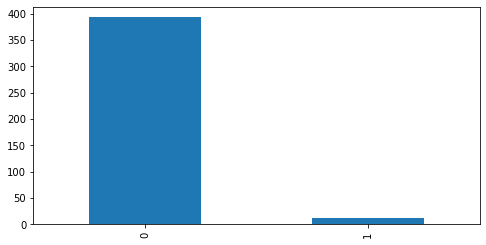

In [2]:
dataset.ANOMALY.value_counts().plot.bar(figsize=(8,4))
dataset.ANOMALY.value_counts()

In [3]:
dataset.head(5)

,REMOTE_PORT,LATENCY,THROUGHPUT,ANOMALY
0,21,15.942875,16.202998,0
1,20,12.666451,15.899084,1
2,80,13.894550,12.958008,0
3,21,13.620813,15.459475,0
4,21,15.705485,15.339565,0


### Gibt es Probleme bei der Anzahl der Datensamples?
Wie können wir dieses Problem angehen? Müssen wir es angehen?

### Datenset aufsplitten

In [4]:
samples = dataset.iloc[:, [1, 2]].values
targets = dataset['ANOMALY'].values

In [5]:
training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.3, random_state=0)

In [6]:
from sklearn.utils import resample

In [7]:
train_data = np.concatenate((training_samples, training_targets[:,np.newaxis]), axis=1)

class_0 = train_data[train_data[:,-1] == 0]
class_1 = train_data[train_data[:,-1] == 1]

majority_size = max(len(class_0), len(class_1))

class_0_upsampled = resample(class_0, replace=True, n_samples=majority_size, random_state=42)
class_1_upsampled = resample(class_1, replace=True, n_samples=majority_size, random_state=42)

train_data_upsampled = np.concatenate((class_0_upsampled, class_1_upsampled))

train_samples_upsampled = train_data_upsampled[:,:-1]
train_targets_upsampled = train_data_upsampled[:,-1]

#### Falls du es geschafft hast, passe den code unten an

In [8]:
training_samples = train_samples_upsampled
training_targets = train_targets_upsampled

### Klassifizieren

In [9]:
# k-Nearest Neighbors model
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(training_samples,training_targets)
knc_prediction = knc.predict(testing_samples)
knc_accuracy = 100.0 * accuracy_score(testing_targets, knc_prediction)
print ("K-Nearest Neighbours accuracy: " + str(knc_accuracy))


K-Nearest Neighbours accuracy: 96.72131147540983


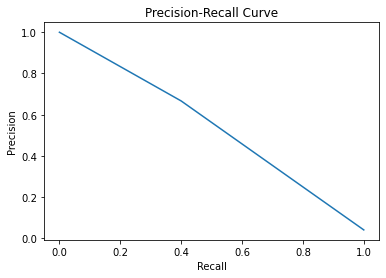

In [10]:
precision, recall, thresholds = precision_recall_curve(testing_targets, knc_prediction)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [11]:
# Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(training_samples,training_targets)
gnb_prediction = gnb.predict(testing_samples)
gnb_accuracy = 100.0 * accuracy_score(testing_targets, gnb_prediction)
print ("Gaussian Naive Bayes accuracy: " + str(gnb_accuracy))

Gaussian Naive Bayes accuracy: 96.72131147540983


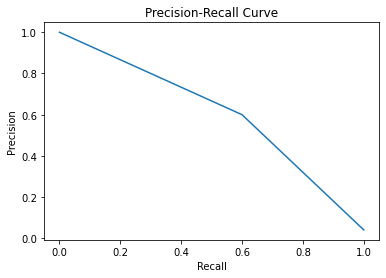

In [12]:
precision, recall, thresholds = precision_recall_curve(testing_targets, gnb_prediction)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Klassifiziere die Daten mit einem DecisionTreeClassifier
https://scikit-learn.org/stable/modules/tree.html

In [13]:
# Decision tree model
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(training_samples,training_targets)
dtc_prediction = dtc.predict(testing_samples)
dtc_accuracy = 100.0 * accuracy_score(testing_targets, dtc_prediction)
print ("Decision Tree accuracy: " + str(dtc_accuracy))

Decision Tree accuracy: 95.90163934426229


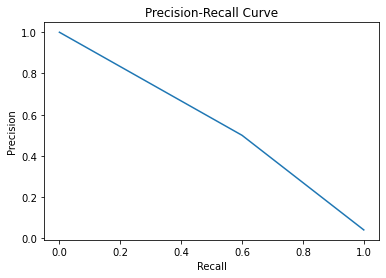

In [14]:
precision, recall, thresholds = precision_recall_curve(testing_targets, dtc_prediction)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Kannst du deinen eignene Classifier bauen? Z.B ein Neuronales Netzwerk?

In [26]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
model = Sequential()
model.add(Dense(32,activation='relu', input_dim=2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(training_samples, training_targets, epochs=10, batch_size=32)

Epoch 1/10
18/18 [==============================] - 1s 1ms/step - loss: 3.8052 - accuracy: 0.5013
Epoch 2/10
18/18 [==============================] - 0s 1ms/step - loss: 1.2113 - accuracy: 0.4987
Epoch 3/10
18/18 [==============================] - 0s 953us/step - loss: 0.7145 - accuracy: 0.6337
Epoch 4/10
18/18 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.5679
Epoch 5/10
18/18 [==============================] - 0s 927us/step - loss: 0.6034 - accuracy: 0.7275
Epoch 6/10
18/18 [==============================] - 0s 939us/step - loss: 0.5895 - accuracy: 0.7015
Epoch 7/10
18/18 [==============================] - 0s 880us/step - loss: 0.5671 - accuracy: 0.7197
Epoch 8/10
18/18 [==============================] - 0s 939us/step - loss: 0.5437 - accuracy: 0.7492
Epoch 9/10
18/18 [==============================] - 0s 939us/step - loss: 0.5559 - accuracy: 0.7147
Epoch 10/10
18/18 [==============================] - 0s 997us/step - loss: 0.5567 - accuracy: 0.7104


In [37]:
model.evaluate(testing_samples, testing_targets)

4/4 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.9426


[0.5058415532112122, 0.9426229596138]